In [1]:
import pandas as pd
import os
import sklearn
import networkx as nx
import numpy as np

## Preprocessing

In [2]:

def get_AMR_df()->pd.DataFrame:
    df = pd.read_excel("../../data/SIR_readings.xlsx", sheet_name='Consolidated_SIRs')
    #set the genome_id col as rownames:
    df.set_index('genome_id', inplace=True)

    return df

df=get_AMR_df()
df

,species,amikacin,amoxicillin,amoxicillin_clavulanic_acid,ampicillin,ampicillin_sulbactam,azithromycin,aztreonam,benzylpenicillin,cefalothin,...,sulfisoxazole,teicoplanin,telithromycin,tetracycline,ticarcillin_clavulanic_acid,tigecycline,tobramycin,trimethoprim,trimethoprim_sulphamethoxazole,vancomycin
genome_id,,,,,,,,,,,,,,,,,,,,,
470.80140,Acinetobacter baumannii,resistant,NaN,NaN,resistant,resistant,NaN,resistant,NaN,NaN,...,NaN,NaN,NaN,resistant,NaN,NaN,susceptible,NaN,resistant,NaN
470.62120,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate,NaN
470.62130,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
470.62140,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate,NaN
470.62150,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313.10321,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
1313.10320,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,susceptible,NaN
1313.10319,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN


In [3]:
species=df['species'].unique()
drugs=list(df.columns[1:])
for s in species:
    for d in drugs:
        sp_df=df[df['species']==s] #filtering a new df for only this species
        sp_df=sp_df[[d]]
        print(sp_df)

              amikacin
genome_id             
470.8014     resistant
470.6212     resistant
470.6213     resistant
470.6214     resistant
470.6215     resistant
...                ...
470.7806   susceptible
470.7805   susceptible
470.7804     resistant
470.7809   susceptible
470.7803     resistant

[1328 rows x 1 columns]
          amoxicillin
genome_id            
470.8014          NaN
470.6212          NaN
470.6213          NaN
470.6214          NaN
470.6215          NaN
...               ...
470.7806          NaN
470.7805          NaN
470.7804          NaN
470.7809          NaN
470.7803          NaN

[1328 rows x 1 columns]
          amoxicillin_clavulanic_acid
genome_id                            
470.8014                          NaN
470.6212                          NaN
470.6213                          NaN
470.6214                          NaN
470.6215                          NaN
...                               ...
470.7806                          NaN
470.7805               

In [4]:
def binarize(cell):

    zero=["susceptible", "non-resistant", "Susceptible-dose dependent", "susceptible*", "non-resistant*", "Susceptible-dose dependent*"]
    one= ["intermediate","resistant","non-susceptible","IS","intermediate*","resistant*","non-susceptible*","IS*"]
    
    if str(cell) in zero:
        return 0
    elif str(cell) in one:
        return 1
    else:
        return cell

In [5]:

def create_species_drugs_files(df:pd.DataFrame):
    '''
    Takes a dataframe of cols: genome_id, species, and several drugs
    filter them to put them in a file for each species, each drug named species_drug.csv
    of this form: genome_id, SIR
    
    --------
    param:
        - df: the dataframe of the AMR SIR readings
    return:
        None
    '''
    species=df['species'].unique()
    drugs=list(df.columns[1:])
    for s in species:

        for d in drugs:
            sp_df=df[df['species']==s] #filtering a new df for only this species
            sp_df=sp_df[[d]] #drop all columns except the col d
            sp_df=sp_df.dropna(subset=[d]) #drop all NaN in col d
            
            if sp_df.empty:
                continue
            
            sp_df.columns=['SIR']
            # sp_df=sp_df['SIR'].apply(binarize)
            print(sp_df)
            # sp_df.to_csv(f'data/phenotypes/{s.replace(" ","_")}_{d}.csv')
    return None

create_species_drugs_files(df)

                   SIR
genome_id             
470.8014     resistant
470.6212     resistant
470.6213     resistant
470.6214     resistant
470.6215     resistant
...                ...
470.7806   susceptible
470.7805   susceptible
470.7804     resistant
470.7809   susceptible
470.7803     resistant

[937 rows x 1 columns]
                  SIR
genome_id            
470.8014    resistant
470.4701   resistant*
470.4702   resistant*
470.4704   resistant*
470.4785   resistant*
...               ...
470.7806    resistant
470.7805    resistant
470.7804    resistant
470.7809    resistant
470.7803    resistant

[757 rows x 1 columns]
                      SIR
genome_id                
470.8014        resistant
470.6212        resistant
470.6213        resistant
470.6214        resistant
470.6215        resistant
...                   ...
470.7806   non_resistant*
470.7805   non_resistant*
470.7804        resistant
470.7809   non_resistant*
470.7803        resistant

[825 rows x 1 columns]
     

In [6]:
import pandas as pd

get_pheno_df= lambda pheno_csv_path: pd.read_csv(pheno_csv_path, index_col=0)
test=get_pheno_df('../../data/phenotypes/Acinetobacter_baumannii_amikacin.csv')

In [7]:
#type of entries in test
test.dtypes
#make the col SIR as int
test['SIR']=test['SIR'].astype(int)
test.dtypes

SIR    int64
dtype: object

In [8]:
_get_pheno_df= lambda pheno_csv_path: pd.read_csv(pheno_csv_path, index_col=0).astype(int)
_get_samples_list= lambda species_ids_path: open(species_ids_path).read().splitlines()

pheno=_get_pheno_df('../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv')

In [9]:
sample_list=_get_samples_list('../../data/PATRIC_IDs/Campylobacter_coli.txt')

In [10]:
def get_gene_presence_matrix(Rtab_presence_matrix_path: str, remove_hypothetical:bool=False) -> pd.DataFrame:
    '''
    Reads a Rtab file of gene presence/absence generated by roary and returns a dataframe.  
    These file should be under data/pangenomes/<species>/roary_pangenome/gene_absence_presence.Rtab
    -- this function filters out hypothetical proteins 

    param:
        - gene_presence_matrix_path: (str) path to the Rtab file

    return:
        - gene_presence_matrix: (pd.DataFrame) dataframe of gene presence/absence
    '''
    df= pd.read_csv(Rtab_presence_matrix_path, index_col=0, delimiter='\t')
    if remove_hypothetical:
        df=df[~df.index.str.contains('group')] #removing hypothetical genes
    return df

presence=get_gene_presence_matrix('../../data/pangenomes/Campylobacter_coli/roary_pangenome/gene_presence_absence.Rtab')

In [11]:
# def get_adjacency_matrix(gene_presence_df: pd.DataFrame) -> pd.DataFrame:
#     '''
#     Takes a gene presence/absence dataframe and returns an adjacency matrix.

#     param: 
#         - gene_presence_df: (pd.DataFrame) dataframe of gene presence/absence  

#     return:
#         - A: (pd.DataFrame) adjacency matrix
#     '''
#     A=gene_presence_df.dot(gene_presence_df.T)
#     A=A.astype(int)
#     for i in range(len(A)): #removing self loops
#         A.iloc[i,i]=0

#     return A

# a= get_adjacency_matrix(presence)

In [12]:
# #make a network out of it
# import networkx as nx

# def get_network_from_adjacency(A: pd.DataFrame) -> nx.Graph:
#     '''
#     Takes an adjacency matrix and returns a networkx graph.

#     param:
#         - A: (pd.DataFrame) adjacency matrix

#     return:
#         - G: (nx.Graph) networkx graph
#     '''
#     G=nx.from_pandas_adjacency(A)
#     return G

# G=get_network_from_adjacency(a)

In [13]:
# print(f"nb of edges:{G.number_of_edges()}")
# print(f"nb of nodes:{G.number_of_nodes()}")
# n=G.number_of_nodes()
# e=G.number_of_edges()
# print(e/(n*(n-1)/2))

In [14]:
# #degree distribution
# import matplotlib.pyplot as plt
# def plot_degree_distribution(G: nx.Graph):
#     '''
#     Plots the degree distribution of a networkx graph.

#     param:
#         - G: (nx.Graph) networkx graph

#     return:
#         None
#     '''
#     degrees=[G.degree(n) for n in G.nodes()]
#     print(degrees)
#     plt.hist(degrees, bins=50)
#     plt.show()
#     return None

# plot_degree_distribution(G)

In [15]:
# #weighted degree distribution
# def plot_weighted_degree_distribution(G: nx.Graph):
#     '''
#     Plots the weighted degree distribution of a networkx graph.

#     param:
#         - G: (nx.Graph) networkx graph

#     return:
#         None
#     '''
#     degrees=[G.degree(n, weight='weight') for n in G.nodes()]
#     plt.hist(degrees, bins=50)
#     plt.show()
#     return None

# plot_weighted_degree_distribution(G)

In [16]:

def _label_samples(pheno_df: pd.DataFrame, samples_list:list) :
    '''
    Takes a dataframe of phenotypes out of the csv file of a species-drug, a list of all samples and returns 3 lists of resistant, susceptible and unclassfied samples
    In the csv if 
    param:
        - pheno_df: (pd.DataFrame) dataframe of phenotypes
        - samples_list: (list) list of all samples  

    output:
        - R: (list) list of resistant samples
        - S: (list) list of susceptible samples
        - U: (list) list of unclassified samples
    '''
    R=[];S=[];U=[]
    for sample in pheno_df.index:

        if pheno_df.loc[sample].values[0]==1:
            sample=str(sample)
            if len(sample)==7:
                sample+='0'
            elif len(sample)==6:
                sample+='00'
            elif len(sample)==5:
                sample+='000'
            elif len(sample)==4:
                sample+='0000'
            R.append(str(sample))
        elif pheno_df.loc[sample].values[0]==0:
            sample=str(sample)
            sample=str(sample)
            if len(sample)==7:
                sample+='0'
            elif len(sample)==6:
                sample+='00'
            elif len(sample)==5:
                sample+='000'
            elif len(sample)==4:
                sample+='0000'
            S.append(str(sample))
        else:
            sample=str(sample)
            if len(sample)==7:
                sample+='0'
            elif len(sample)==6:
                sample+='00'
            elif len(sample)==5:
                sample+='000'
            elif len(sample)==4:
                sample+='0000'
            U.append(str(sample))
    return R,S,U

R,S,U=_label_samples(pheno, sample_list)

In [17]:
get_subdf_cols= lambda df, col_list: df[col_list]

R_df=get_subdf_cols(presence, R)
S_df=get_subdf_cols(presence, S)

In [18]:
# count the values in each row that are 1
def create_RS_presence_stats_matrix(R: pd.DataFrame, S: pd.DataFrame) -> pd.DataFrame:
    '''
    takes the presence matrix of R samples and S samples and returns a dataframe of the count of genes present and absent in each group of samples.

    *This will memoize the entries needed for the log odds ratio computation.*

    
    _e.g., output:_

    | Gene       | R_present | R_absent | S_present | S_absent |
    |------------|-----------|----------|-----------|----------|
    | group_1001 | 96        | 0        | 187       | 0        |
    | tig        | 96        | 0        | 187       | 0        |
    | legF_1     | 96        | 0        | 187       | 0        |

    param:
        - R: (pd.DataFrame) presence matrix of R samples (output of get_subdf_cols)
        - S: (pd.DataFrame) presence matrix of S samples

    return:
        - new_df: (pd.DataFrame) dataframe of the count of genes present and absent in each group of samples.


    '''
    R_present=R.sum(axis=1)
    R_absent=R.shape[1] - R_present
    S_present=S.sum(axis=1)
    S_absent=S.shape[1]-S_present

    log_odds=np.log((R_present/R_absent)/(S_present/S_absent))

    new_df=pd.DataFrame({'R_present':R_present, 'R_absent':R_absent, 'S_present':S_present, 'S_absent':S_absent, 'log_odds':log_odds})
    return new_df

contigency_table=create_RS_presence_stats_matrix(R_df, S_df)

/home/rayane/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
def log_odds(pheno_path:str, species_ids_path:str, Rtab_presence_matrix_path:str):
    '''
    Takes the path to the phenotypes csv, the species ids file and the gene presence/absence matrix and returns the log odds ratio matrix of the genes.

    param:
        - pheno_path: (str) path to the phenotypes csv
        - species_ids_path: (str) path to the species ids file
        - Rtab_presence_matrix_path: (str) path to the gene presence/absence matrix

    return:
        - contigency_table: (pd.DataFrame) dataframe of the count of genes present and absent in each group of samples.
    '''
    pheno=_get_pheno_df(pheno_path)
    sample_list=_get_samples_list(species_ids_path)
    presence=get_gene_presence_matrix(Rtab_presence_matrix_path)
    R,S,U=_label_samples(pheno, sample_list)
    R_df=get_subdf_cols(presence, R)
    S_df=get_subdf_cols(presence, S)
    stats_table=create_RS_presence_stats_matrix(R_df, S_df)
    log_odds_table=stats_table['log_odds']
    return log_odds_table

log_odds('../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv', '../../data/PATRIC_IDs/Campylobacter_coli.txt', '../../data/pangenomes/Campylobacter_coli/roary_pangenome/gene_presence_absence.Rtab')

/home/rayane/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Gene
group_1001    NaN
tig           NaN
legF_1        NaN
rnr           NaN
mobA          NaN
             ... 
group_963     inf
group_971    -inf
group_975     inf
group_976     inf
thrZ_2       -inf
Name: log_odds, Length: 5207, dtype: float64

In [20]:
f"# resistance is {len(R)} and S is {len(S)} and U is {len(U)}"
len(R)+len(S)

283

In [21]:
# def _split_matrix_by_phenotype(unlabeled_presence_df:pd.DataFrame, R_list: list, S_list: list):
#     '''
#     takes a gene absence presence dataframe (n x m) with the samples classification and splits it to 2 dataframes:
#         - one that represents all R samples (samples found in R_list)
#         - one that represents all S samples (found in S_list)
#     and returns them in this order: R then S

#     param:
#         - unlabeled_presence_df: (pd.DataFrame) the data frame output of data_utils.get_gene_presence_matrix
#         - R_list: (list) samples genome_id that have a R (1) phenotype
#         - S_list: (list) samples having the 0 phenotype
    
#     return:
#         - R_df: (pd.DataFrame) data frame where columns are only for R samples
#         - S_df: (pd.DataFrame) df where cols are only for S samples

#     _this is a helper function to create a contigency table for each gene_
#     '''
#     R_mask=unlabeled_presence_df.columns.values.astype(float).tolist().isin(R_list)
#     R_df=unlabeled_presence_df[R_mask]

#     S_mask=unlabeled_presence_df.columns.values.astype(float).tolist().isin(S_list)
#     S_df=unlabeled_presence_df[S_mask]

#     return R_df, S_df

# R_df, S_df=_split_matrix_by_phenotype(presence,R,S)

## ML and SL

In [22]:
#performing PCA on the gene presence/absence matrix

#1st get the labels as an add to the gene presence/absence matrix
def add_labels_to_presence_matrix(presence_df: pd.DataFrame, pheno_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Adds the phenotypes to the gene presence/absence matrix.

    param:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence
        - pheno_df: (pd.DataFrame) dataframe of phenotypes

    return:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence with phenotypes
    '''
    presence_df=presence_df.T

    presence_df.index.name='genome_id'
    presence_df.index = presence_df.index.astype(float)

    presence_df=presence_df.join(pheno_df, how='outer')
    
    return presence_df

labeled_matrix=add_labels_to_presence_matrix(presence, pheno)

#### classification

In [23]:
# #use LR with all possible interactions effets
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# X=labeled_matrix.iloc[:,:-1]
# y=labeled_matrix.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


# model=LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# y_pred=model.predict(X_test)
# accuracy_score(y_test, y_pred)

# #get coef and sig of each feature
# model.coef_[0]

# #now train model 2 with interaction effects
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(interaction_only=True)
# X_train_poly=poly.fit_transform(X_train)
# X_test_poly=poly.fit_transform(X_test)

# model2=LogisticRegression(max_iter=1000)
# model2.fit(X_train_poly, y_train)

# y_pred2=model2.predict(X_test_poly)
# accuracy_score(y_test, y_pred2)

#### pca

In [24]:
#perform PCA

import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_PCA(presence_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Performs PCA on the gene presence/absence matrix.

    param:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence

    return:
        - pca_df: (pd.DataFrame) dataframe of the PCA
    '''
    #1. drop SIR cols (label)
    X=presence_df.drop(columns=['SIR'])

    #2. standardize the data
    X=StandardScaler().fit_transform(X)

    #3. PCA
    pca=PCA(n_components=3)
    pca_result=pca.fit_transform(X)

    #4. create a df
    pca_df=pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
    pca_df.index=presence_df.index

    return pca_df

pca_df=perform_PCA(labeled_matrix)

In [25]:
pca_df

,PC1,PC2,PC3
genome_id,,,
195.2024,-11.521218,1.845015,1.109207
195.2025,-11.750949,1.817723,0.979026
195.2026,11.547885,-5.315311,-5.754656
195.2027,11.722197,-2.495364,3.379699
195.2028,-14.883477,1.771195,0.681097
...,...,...,...
195.2671,-14.805719,2.307933,0.184187
195.2672,-15.460609,2.891123,1.076096
195.2673,-13.923694,2.353915,5.779220


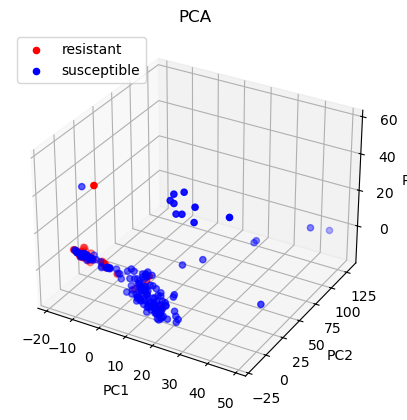

In [26]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

def plot_PCA(pca_df: pd.DataFrame, pheno_df: pd.DataFrame):
    '''
    Plots the PCA.

    param:
        - pca_df: (pd.DataFrame) dataframe of the PCA
        - pheno_df: (pd.DataFrame) dataframe of phenotypes

    return:
        None
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA')

    R=pca_df[pheno_df['SIR']==1]
    S=pca_df[pheno_df['SIR']==0]

    ax.scatter(R['PC1'], R['PC2'], R['PC3'], c='r', marker='o', label='resistant')
    ax.scatter(S['PC1'], S['PC2'], S['PC3'], c='b', marker='o', label='susceptible')

    plt.legend(loc='upper left')
    plt.show()
    return None

plot_PCA(pca_df, labeled_matrix)

In [31]:
from sklearn.decomposition import PCA

def top_features(X, n=100):
    '''
    Computes a PCA and extracts the top features.

    param:
        - X: (DataFrame) data
        - n: (int) number of top features to return

    return:
        - top_features: (list) names of the top features
    '''
    # Compute the PCA
    pca = PCA(n_components=n)
    pca.fit(X)

    # Get the loadings of the features on the first principal component
    loadings = pca.components_[0]

    # Get the indices of the features sorted by their loadings
    sorted_indices = np.abs(loadings).argsort()[::-1]

    # Get the names of the top features
    top_features = [X.columns[i] for i in sorted_indices[:n]]

    return top_features

top_50_genes=top_features(presence.T, 50)

In [30]:
original_alpha = 0.05  
num_tests = 10000 

corrected_p_value = original_alpha / num_tests
corrected_p_value

5e-06

In [56]:
def get_core(presence_matrix, prop=0.95):
    '''
    Takes a gene presence/absence matrix and returns the core genome of the species.

    param:
        - prop: (float) proportion of presence to satrt considering as core
        - presence_matrix: (pd.DataFrame) dataframe of gene presence/absence

    return:
        - core: (list) list of genes that are in the core genome
    '''
    core=[]
    for gene in presence_matrix.index:
        if presence_matrix.loc[gene].sum()>prop*len(presence_matrix.columns):
            core.append(gene)
    return core

def get_unique(presence_matrix, prop=0.15):
    '''
    Takes a gene presence/absence matrix and returns the unique genes of the species.

    param:
        - prop: (float) proportion of presence to start considering as unique
        - presence_matrix: (pd.DataFrame) dataframe of gene presence/absence

    return:
        - unique: (list) list of genes that are unique to the species
    '''
    unique=[]
    for gene in presence_matrix.index:
        if presence_matrix.loc[gene].sum()<prop*len(presence_matrix.columns):
            unique.append(gene)
    return unique

core = get_core(presence)
unique = get_unique(presence, 0.05)
len(unique)

#remove core and unique genes from the presence matrix
accessory=presence.drop(core+unique)
accessory.shape

accessory_labeled=add_labels_to_presence_matrix(accessory, pheno)
accessory.shape

(1212, 283)

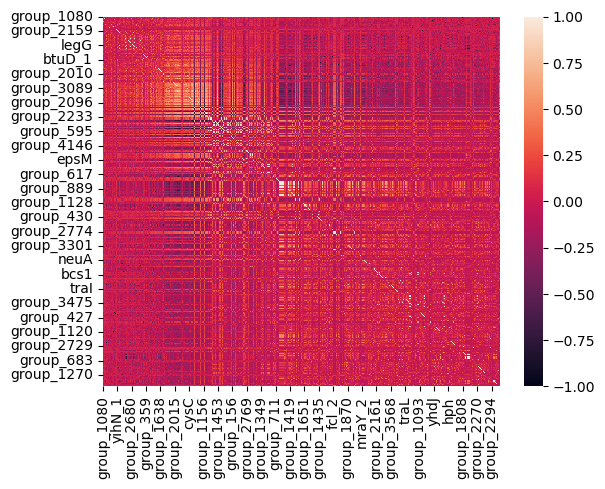

In [58]:
X=accessory_labeled
corr_matrix = X.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_matrix is your correlation matrix
sns.heatmap(corr_matrix)

plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

for gene1_index in range(50):
    gene1=top_50_genes[gene1_index]
    for gene2 in range(gene1_index+1, 100):
        gene2=top_50_genes[gene2]

        X=labeled_matrix[[gene1, gene2]]
        y=labeled_matrix['SIR']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

        poly = PolynomialFeatures(interaction_only=True)

        X_train_poly=poly.fit_transform(X_train)
        X_test_poly=poly.fit_transform(X_test)

        # Add a constant to the features
        X_train_poly = sm.add_constant(X_train_poly)
        X_test_poly = sm.add_constant(X_test_poly)

        model=sm.Logit(y_train, X_train_poly)
        result=model.fit()

        y_pred=result.predict(X_test_poly)

        print(f"gene1: {gene1}, gene2: {gene2}, p-values: {result.pvalues}")

         Current function value: 0.361474
         Iterations: 35


LinAlgError: Singular matrix